In [19]:
# 信用卡违约率分析
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# 数据加载
data = pd.read_csv('./UCI_Credit_Card.csv')

In [3]:
# 数据探索
data.shape  # 查看数据集大小

(30000, 25)

In [4]:
data.describe()  # 数据集概览

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# 查看下一个月违约率的情况
next_month = data['default.payment.next.month'].value_counts()
next_month

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [6]:
df = pd.DataFrame({'default.payment.next.month': next_month.index, 'values': next_month.values})

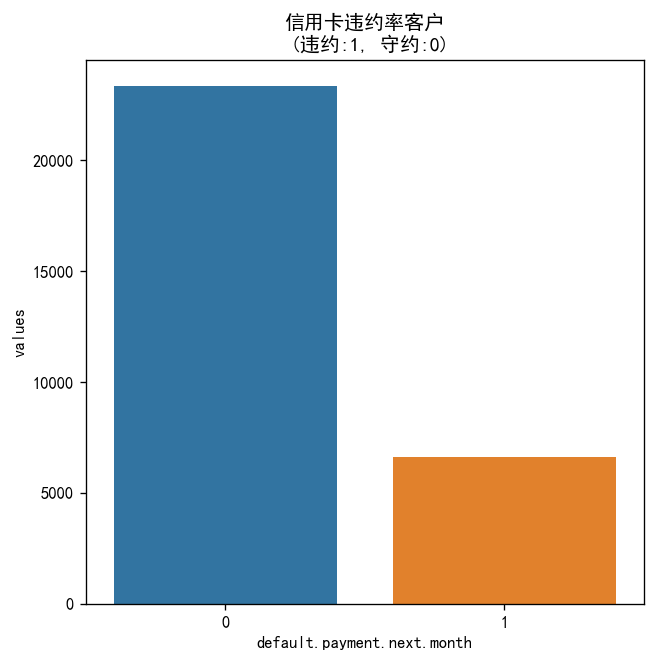

In [7]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.figure(figsize=(6, 6), dpi=120)
plt.title('信用卡违约率客户\n (违约:1, 守约:0)')
sns.set_color_codes('pastel')
sns.barplot(x = 'default.payment.next.month', y='values', data=df)
locs, labels = plt.xticks()
plt.show()

In [8]:
# 特征选择，去掉ID字段、最后一个结果字段即可
data.drop(['ID'], inplace=True, axis=1)  # ID这个字段没有用
target = data['default.payment.next.month'].values

In [9]:
columns = data.columns.tolist()
columns

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [10]:
columns.remove('default.payment.next.month')
columns

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [11]:
features = data[columns].values

In [12]:
# 30%作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(
    features, target, test_size=0.30, stratify=target, random_state=1)

In [28]:
# 构造各种分类器
classifiers = [
    SVC(random_state=1, kernel='rbf'),
    DecisionTreeClassifier(random_state=1, criterion='gini'),
    RandomForestClassifier(random_state=1, criterion='gini'),
    KNeighborsClassifier(metric='minkowski'),
    AdaBoostClassifier(random_state=1)
]

In [29]:
# 分类器名称
classifier_names = [
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
    'adaboostclassifier',
]

In [30]:
# 分类器参数
classifier_param_grid = [
    {'svc__C': [1], 'svc__gamma': [0.01]},
    {'decisiontreeclassifier__max_depth': [6, 9, 11]},
    {'randomforestclassifier__n_estimators': [3, 5, 6]},
    {'kneighborsclassifier__n_neighbors': [4, 6, 8]},
    {'adaboostclassifier__n_estimators': [10, 50, 100]}
]

In [31]:
# 对具体的分类器进行GridSearchCV参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score='accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print('GridSearch最优参数: ', search.best_params_)
    print('GridSearch最优分数: %.4lf' % search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print('准确率 %.4f' % accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y, predict_y)
    return response

In [32]:
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
        ('scalar', StandardScaler()),
        (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid, score='accuracy')

GridSearch最优参数:  {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch最优分数: 0.8186
准确率 0.8172
GridSearch最优参数:  {'decisiontreeclassifier__max_depth': 6}
GridSearch最优分数: 0.8208
准确率 0.8113
GridSearch最优参数:  {'randomforestclassifier__n_estimators': 6}
GridSearch最优分数: 0.8004
准确率 0.7994
GridSearch最优参数:  {'kneighborsclassifier__n_neighbors': 8}
GridSearch最优分数: 0.8040
准确率 0.8036
GridSearch最优参数:  {'adaboostclassifier__n_estimators': 10}
GridSearch最优分数: 0.8188
准确率 0.8129
